In [ ]:
!pip install pyod
!pip install --upgrade pyod  # to make sure that the latest version is installed!

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.0.9-py3-none-any.whl size=184097 sha256=44bb84869fd04576d14409215e2cd52e6e98deaba2065785449a6c2463c52e38
  Stored in directory: /root/.cache/pip/wheels/83/55/6b/552e083cf5509c0afe808b76cf434f1be284d01a112623bd37
Successfully built pyod
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.utils.data import evaluate_print

%matplotlib inline
import matplotlib.font_manager
state=42

In [ ]:
import pandas as pd

In [ ]:
titanic = pd.read_excel("titanic3.xls")
titanic.shape

(1309, 14)

In [ ]:
titanic['age'].fillna(titanic['age'].mode()[0], inplace=True)
titanic['cabin'].fillna(titanic['cabin'].mode()[0], inplace=True)
titanic['boat'].fillna(titanic['boat'].mode()[0], inplace=True)
titanic['body'].fillna(titanic['body'].mode()[0], inplace=True)
titanic['sex'].fillna(titanic['sex'].mode()[0], inplace=True)
titanic['survived'].fillna(titanic['survived'].mode()[0], inplace=True)
titanic['home.dest'].fillna(titanic['home.dest'].mode()[0], inplace=True)

<Axes: title={'center': 'Histogram of the age'}, ylabel='Frequency'>

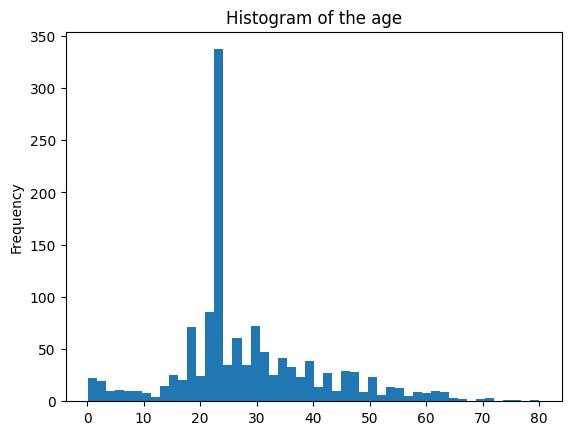

In [ ]:
titanic['age'].plot.hist(
  bins = 50,
  title = "Histogram of the age"
)

In [ ]:
score = pd.read_csv("score.csv")
score

,Overs,Scores
0,1,15
1,2,10
2,3,17
3,4,10
4,5,12
5,6,20
6,7,100
7,8,7
8,9,8
9,10,11


In [ ]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=1.0)
model.fit(score[['Scores']])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2, n_estimators=1000)

In [ ]:
score['Scores_scores']=model.decision_function(score[['Scores']])
score['Scores_anomaly']=model.predict(score[['Scores']])
score.head(20)

,Overs,Scores,Scores_scores,Scores_anomaly
0,1,15,0.220030,1
1,2,10,0.236555,1
2,3,17,0.181970,1
3,4,10,0.236555,1
4,5,12,0.235783,1
5,6,20,0.116226,1
6,7,100,-0.019951,-1
7,8,7,0.146782,1
8,9,8,0.173113,1
9,10,11,0.247116,1


uNIVARIATE ANALYSIS FOR dIFFERENR COLUMNS

In [ ]:
score2 = pd.read_csv("score2.csv")
score2.shape

(20, 4)

In [ ]:
score2.columns

Index(['Overs', 'Match1Runs', 'Match2Runs', 'Match3Runs'], dtype='object')

In [ ]:
columns = ['Match1Runs', 'Match2Runs', 'Match3Runs']

In [ ]:
for column in columns:
  print("running for:" , column)
  model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=1.0)
  model.fit(score2[[column]])
  score_column = column + "_scores"
  anamoly = column + "_anamoly"
  score2[score_column]=model.decision_function(score2[[column]])
  score2[anamoly]=model.predict(score2[[column]])
print("Completed")  


running for: Match1Runs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


running for: Match2Runs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


running for: Match3Runs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Completed


In [ ]:
score2.to_csv("score2_with_anamoly.csv")

**Student Marks Anlysis**

In [ ]:
file_name = "student_marks.xlsx"
columns = ['Marks_20', 'Marks_50', 'Marks_100']
df_student = pd.read_excel(file_name)
df_student.columns

Index(['RollNumber', 'Marks_20', 'Marks_50', 'Marks_100'], dtype='object')

In [ ]:
def get_univariate_iforest_anamoly(df , columns):
  for column in columns:
    print("running for:" , column)
    model=IsolationForest(n_estimators=1000,max_samples='auto',contamination=float(0.2),max_features=1.0)
    model.fit(df[[column]])
    score_column = column + "_scores"
    anamoly = column + "_anamoly"
    df[score_column]=model.decision_function(df[[column]])
    df[anamoly]=model.predict(df[[column]])
  return df


In [ ]:
df_student_with_anamoly = get_univariate_iforest_anamoly(df_student ,columns )
df_student_with_anamoly.head()

running for: Marks_20


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


running for: Marks_50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


running for: Marks_100


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_scores,Marks_20_anamoly,Marks_50_scores,Marks_50_anamoly,Marks_100_scores,Marks_100_anamoly,combine_scores,combine_anomaly
0,1,12,8,71,0.146689,1,-0.180043,-1,0.023860,1,0.009492,1
1,2,13,23,10,0.136176,1,0.121209,1,-0.275513,-1,-0.006328,-1
2,3,-8,36,59,-0.253548,-1,0.131104,1,0.121564,1,-0.020861,-1
3,4,12,34,53,0.146689,1,0.135640,1,0.078169,1,0.178397,1
4,5,14,34,57,0.098569,1,0.135640,1,0.118158,1,0.176597,1


In [ ]:
df_student_with_anamoly.to_excel("df_student_with_anamoly.xlsx")

MutiVariable with IFORST

In [ ]:
column2 = ['Marks_20', 'Marks_50', 'Marks_100']

In [ ]:
def get_multivariate_iforest_anamoly(df, columns):
  model_IF = IsolationForest(contamination=float(0.1),random_state=42)
  model_IF.fit(df[column2])
  df['combine_scores']=model_IF.decision_function(df[columns])
  df['combine_anomaly']=model_IF.predict(df[columns])
  return df

In [ ]:
df_student_with_anamoly = get_multivariate_iforest_anamoly(df_student_with_anamoly ,column2 )

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
model_IF = IsolationForest(contamination=float(0.1),random_state=42)

In [ ]:
model_IF.fit(score2[column2])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

In [ ]:
score2['combine_scores']=model_IF.decision_function(score2[column2])
score2['combine_anomaly']=model_IF.predict(score2[column2])

In [ ]:
score2.to_csv("score2_with_combine anamoly.csv")

In [ ]:
contamination = 0.1 # percentage of outliers

In [ ]:
X_train = df_student["Marks_20"].to_numpy().reshape(-1, 1)
X_train

array([[12],
       [13],
       [-8],
       [12],
       [14],
       [12],
       [20],
       [16],
       [ 8],
       [10],
       [13],
       [11],
       [ 9],
       [15],
       [ 5]])

In [ ]:
# train IForest detector
from pyod.models.iforest import IForest
clf_name = 'IForest'
clf = IForest()
clf.fit(X_train)

IForest(behaviour='old', bootstrap=False, contamination=0.1, max_features=1.0,
    max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
    verbose=0)

In [ ]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_ # binary labels (0: inliers, 1: outliers)

In [ ]:
y_train_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
df_student["Marks20_Anamoly"] = list(y_train_pred)
df_student[['RollNumber',	'Marks_20' ,'Marks_20_anamoly', 'Marks20_Anamoly']]

,RollNumber,Marks_20,Marks_20_anamoly,Marks20_Anamoly
0,1,12,1,0
1,2,13,1,0
2,3,-8,-1,1
3,4,12,1,0
4,5,14,1,0
5,6,12,1,0
6,7,20,-1,1
7,8,16,1,0
8,9,8,1,0
9,10,10,1,0


**PyOD Library**

In [60]:
file_name = "student_marks.xlsx"
columns = ['Marks_20', 'Marks_50', 'Marks_100']
df_student = pd.read_excel(file_name)
df_student.columns

Index(['RollNumber', 'Marks_20', 'Marks_50', 'Marks_100'], dtype='object')

In [81]:
def fit_model(model, data, column):
    
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    c_name = column + "_Predictions"
    df[c_name] = predictions
    
    
    
    return df

In [94]:
# Not for iForest
def get_anomaly_scores(model):
  anomaly_scores = model.decision_scores_
  threshold = model.threshold_
  return anomaly_scores, threshold

In [76]:
import numpy as np
import matplotlib.pyplot as plt
def plot_anomalies(df, x='date', y='amount' , prediction_columns='Marks_20_Predictions'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df[prediction_columns].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

In [84]:
iso_forest = IsolationForest(n_estimators=125)
column = "Marks_20"
iso_df = fit_model(iso_forest,df_student , column)
c_name = column + "_Predictions"
iso_df[c_name] = iso_df[c_name].map(lambda x: 1 if x==-1 else 0)
iso_df.head()

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions
0,1,12,8,71,0
1,2,13,23,10,0
2,3,-8,36,59,1
3,4,12,34,53,0
4,5,14,34,57,0


Anomaly Scores: [0.      0.33725 6.745   0.      0.6745  0.      2.698   1.349   1.349
 0.6745  0.33725 0.33725 1.01175 1.01175 2.36075], 
Threshold: 3.5


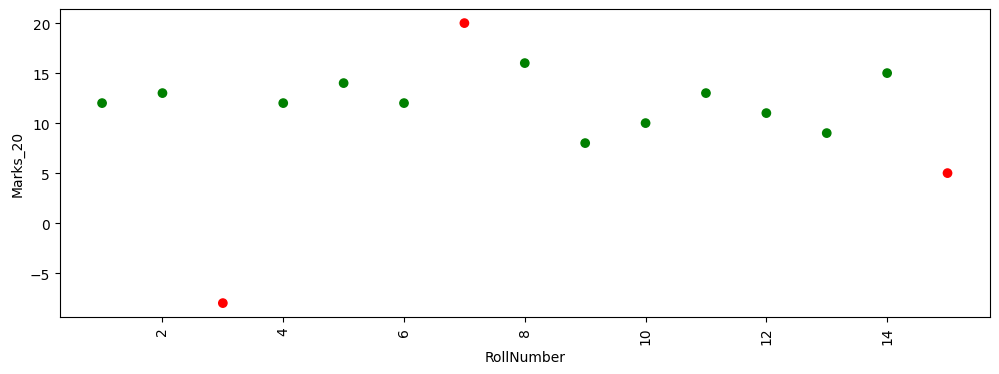

In [77]:

plot_anomalies(iso_df ,'RollNumber', "Marks_20" )

In [93]:
iso_df

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions
0,1,12,8,71,0
1,2,13,23,10,0
2,3,-8,36,59,1
3,4,12,34,53,0
4,5,14,34,57,0
5,6,12,23,52,0
6,7,20,20,67,1
7,8,16,25,50,0
8,9,8,35,65,0
9,10,10,41,63,0


**MAD Model**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


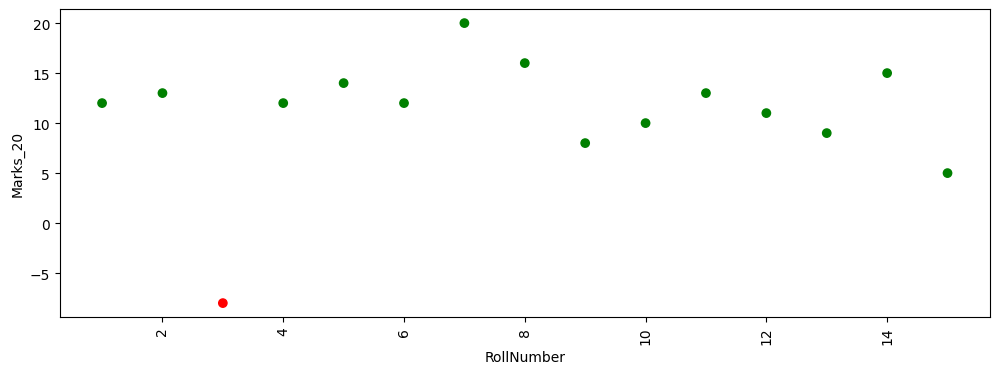

In [85]:
"""Median Absolute Deviation"""
from pyod.models.mad import MAD

mad_model = MAD()
column = "Marks_20"
mad_df = fit_model(mad_model,df_student , column)
plot_anomalies(mad_df ,'RollNumber', "Marks_20" )

In [92]:
mad_df

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions
0,1,12,8,71,0
1,2,13,23,10,0
2,3,-8,36,59,1
3,4,12,34,53,0
4,5,14,34,57,0
5,6,12,23,52,0
6,7,20,20,67,0
7,8,16,25,50,0
8,9,8,35,65,0
9,10,10,41,63,0


In [96]:
anomaly_scores, threshold = get_anomaly_scores(mad_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [0.      0.33725 6.745   0.      0.6745  0.      2.698   1.349   1.349
 0.6745  0.33725 0.33725 1.01175 1.01175 2.36075], 
Threshold: 3.5


**KNN Model**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


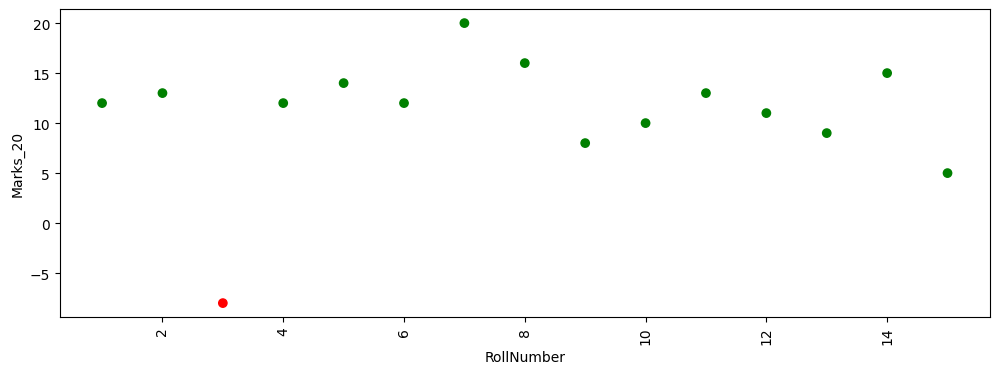

In [87]:
"""KNN Based Outlier Detection"""
from pyod.models.knn import KNN
knn_model = KNN()
column = "Marks_20"
knn_df = fit_model(knn_model,df_student , column)
plot_anomalies(knn_df ,'RollNumber', column )

In [90]:
knn_df

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions
0,1,12,8,71,0
1,2,13,23,10,0
2,3,-8,36,59,1
3,4,12,34,53,0
4,5,14,34,57,0
5,6,12,23,52,0
6,7,20,20,67,0
7,8,16,25,50,0
8,9,8,35,65,0
9,10,10,41,63,0


In [97]:
anomaly_scores, threshold = get_anomaly_scores(knn_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [ 1.  1. 19.  1.  2.  1.  7.  4.  4.  2.  1.  2.  3.  3.  7.], 
Threshold: 7.0


**Local Outlier Factor Model(LOF)**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_lof.py:282: UserWarning: n_neighbors (20) is greater than the total number of samples (15). n_neighbors will be set to (n_samples - 1) for estimation.
  warnings.warn(


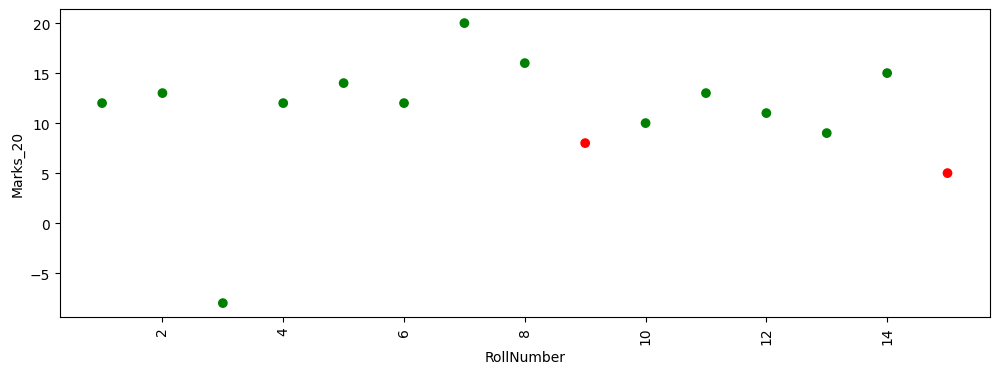

In [88]:
"""LOF Based Outlier Detection"""
from pyod.models.lof import LOF
lof_model = LOF()
column = "Marks_20"
lof_df = fit_model(lof_model,df_student , column)
plot_anomalies(lof_df ,'RollNumber', column )

In [89]:
lof_df

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions
0,1,12,8,71,0
1,2,13,23,10,0
2,3,-8,36,59,0
3,4,12,34,53,0
4,5,14,34,57,0
5,6,12,23,52,0
6,7,20,20,67,0
7,8,16,25,50,0
8,9,8,35,65,1
9,10,10,41,63,0


In [98]:
anomaly_scores, threshold = get_anomaly_scores(lof_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [1.00311737 0.99943742 0.97367776 1.00311737 0.99575747 1.00311737
 0.97367776 0.98839757 1.01783718 1.01047728 0.99943742 1.00679733
 1.01415723 0.99207752 1.02151713], 
Threshold: 1.0163652004067585


In [99]:
# PyOD More

In [103]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.cblof import CBLOF
from pyod.models.hbos import HBOS
from pyod.models.ocsvm import OCSVM
from pyod.utils.data import generate_data, get_outliers_inliers
from pyod.utils.data import evaluate_print

%matplotlib inline
import matplotlib.font_manager
state=42

In [100]:
# by default the outlier fraction is 0.1 in generate data function 
outlier_fraction = 0.1

In [ ]:
model_list= [''Angle-based Outlier Detector (ABOD)']

In [104]:
models = {
     'Angle-based Outlier Detector (ABOD)'   : ABOD(contamination=outlier_fraction),

     'Isolation Forest': IForest(contamination=outlier_fraction,random_state=state),

     'Cluster-based Local Outlier Factor (CBLOF)':CBLOF(contamination=outlier_fraction,check_estimator=False, random_state=state),

     'Histogram-base Outlier Detection (HBOS)': HBOS(contamination=outlier_fraction),

     'K Nearest Neighbors (KNN)' :  KNN(contamination=outlier_fraction),
     
     "Support Vector Machine":OCSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,max_iter=-1)
}

In [127]:
def fit_model_2(model, data, column):
    
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1).astype(float)
    model.fit(data_to_predict)
    # predict raw anomaly score
    scores_pred = model.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(data_to_predict)
    #predictions = model.fit_predict(data_to_predict)
    c_name_prediction = column + "_Predictions"
    c_name_score = column + "_Score"
    df[c_name_prediction] = y_pred
    df[c_name_score] = scores_pred
    # threshold value to consider a datapoint inlier or outlier
    threshold = stats.scoreatpercentile(scores_pred,100 *outlier_fraction)
    return df,threshold

In [128]:
#model = models["Angle-based Outlier Detector (ABOD)"]
model = models["Isolation Forest"]
column = "Marks_20"
df_ABOD,threshold = fit_model_2(model, df_student,column)
print(threshold)

df_ABOD

-3.8163916471489756e-17


,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,0.257755
1,2,13,23,10,0,0.247103
2,3,-8,36,59,1,-0.152475
3,4,12,34,53,0,0.257755
4,5,14,34,57,0,0.197705
5,6,12,23,52,0,0.257755
6,7,20,20,67,1,-0.027777
7,8,16,25,50,0,0.132894
8,9,8,35,65,0,0.160115
9,10,10,41,63,0,0.213350


In [122]:
model = models["Isolation Forest"]
column = "Marks_20"
df_IF = fit_model_2(model, df_student,column)

df_IF

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,0.257755
1,2,13,23,10,0,0.247103
2,3,-8,36,59,1,-0.152475
3,4,12,34,53,0,0.257755
4,5,14,34,57,0,0.197705
5,6,12,23,52,0,0.257755
6,7,20,20,67,1,-0.027777
7,8,16,25,50,0,0.132894
8,9,8,35,65,0,0.160115
9,10,10,41,63,0,0.213350


In [123]:
model = models["Cluster-based Local Outlier Factor (CBLOF)"]
column = "Marks_20"
df_CBLOF = fit_model_2(model, df_student,column)

df_CBLOF

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,-0.000000
1,2,13,23,10,0,-0.333333
2,3,-8,36,59,0,-0.000000
3,4,12,34,53,0,-0.000000
4,5,14,34,57,1,-0.666667
5,6,12,23,52,0,-0.000000
6,7,20,20,67,0,-0.000000
7,8,16,25,50,0,-0.500000
8,9,8,35,65,0,-0.500000
9,10,10,41,63,0,-0.500000


In [124]:
model = models["Histogram-base Outlier Detection (HBOS)"]
column = "Marks_20"
df_HBOS = fit_model_2(model, df_student,column)

df_HBOS

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,-2.041820
1,2,13,23,10,0,-2.041820
2,3,-8,36,59,0,-3.013806
3,4,12,34,53,0,-2.041820
4,5,14,34,57,0,-2.041820
5,6,12,23,52,0,-2.041820
6,7,20,20,67,0,-3.013806
7,8,16,25,50,0,-2.760049
8,9,8,35,65,0,-3.013806
9,10,10,41,63,0,-2.544321


In [125]:
model = models["K Nearest Neighbors (KNN)"]
column = "Marks_20"
df_HBOS = fit_model_2(model, df_student,column)

df_HBOS

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,-1.0
1,2,13,23,10,0,-1.0
2,3,-8,36,59,1,-18.0
3,4,12,34,53,0,-1.0
4,5,14,34,57,0,-2.0
5,6,12,23,52,0,-1.0
6,7,20,20,67,0,-7.0
7,8,16,25,50,0,-3.0
8,9,8,35,65,0,-3.0
9,10,10,41,63,0,-2.0


In [126]:
model = models["Support Vector Machine"]
column = "Marks_20"
df_SVM = fit_model_2(model, df_student,column)

df_SVM

,RollNumber,Marks_20,Marks_50,Marks_100,Marks_20_Predictions,Marks_20_Score
0,1,12,8,71,0,0.000253
1,2,13,23,10,1,-0.000277
2,3,-8,36,59,0,-0.000170
3,4,12,34,53,0,0.000253
4,5,14,34,57,0,-0.000169
5,6,12,23,52,0,0.000253
6,7,20,20,67,0,0.000092
7,8,16,25,50,0,-0.000170
8,9,8,35,65,0,0.001245
9,10,10,41,63,0,0.000806


In [ ]:
for i, (model_name,model) in enumerate(models.items()) :
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    # fit the dataset to the model
    model.fit(X_train)

    # predict raw anomaly score
    scores_pred = model.decision_function(X_train)*-1

    # prediction of a datapoint category outlier or inlier
    y_pred = model.predict(X_train)